# Customer Churn Analysis

## Problem Statement

Here's a business problem that we can solve using analytics and machine learning:

Problem:

A leading e-commerce company wants to predict which customers are likely to churn (stop making purchases) in the next 30 days. The company has a large dataset of customer information, including demographics, purchase history, and browsing behavior.

Goal:

Develop a machine learning model that can accurately predict customer churn, allowing the company to proactively target high-risk customers with personalized marketing campaigns and retention strategies.

Dataset:

The dataset includes the following variables:

- Customer demographics (age, gender, location, etc.)
- Purchase history (frequency, recency, amount spent, etc.)
- Browsing behavior (pages visited, time spent on site, etc.)
- Customer feedback (ratings, reviews, etc.)

Task:

Using analytics and machine learning techniques, develop a predictive model that can identify customers at high risk of churning. The model should be able to:

- Identify the most important factors contributing to customer churn
- Predict the likelihood of churn for each customer
- Provide recommendations for personalized marketing campaigns and retention strategies to target high-risk customers

Possible approaches:

- Logistic regression
- Decision trees
- Random forests
- Gradient boosting

Evaluation metrics:

- Accuracy
- Precision
- Recall
- F1 score
- ROC-AUC score

This problem is a classic example of a binary classification problem, where we want to predict a binary outcome (churn or not churn) based on a set of input variables. By solving this problem, we can demonstrate the application of machine learning techniques to real-world business problems and develop a predictive model that can drive business value.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')

## Step 1: Data Loading and Understanding

In [2]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
def data_understanding(data):
    # Loading of the first five records of the dataset
    print('Dataset overview')
    print(data.head())
    print('\n')

    # Shape of the dataset 
    print('Shape of the dataset')
    print(data.shape)
    print('\n')

    # Data types of the columns
    print('Data types of the columns:')
    print(data.dtypes)
    print('\n')

    # Checking for missing values
    print('Checking for missing values:')
    print(data.isnull().sum())
    print('\n')

    # Description of the Numerical columns data
    print('Numerical description')
    print(data.describe())
    print('\n')

    # Description of the Categorical columns data
    print('Categorical description')
    print(data.describe(include='object'))
    print('\n')

    # Showing the information of the dataset
    print('Information of the dataset:')
    print(data.info())
    print('\n')

    # Checking for duplicates in the dataset
    print('Duplicates in the dataset')
    print(data.duplicated().sum())
    print('\n')

In [5]:
data_understanding(df)

Dataset overview
   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       

## Step 2: Data Exploration

### Customer Demographics

In [6]:
df.head(2)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


- #### Distribution of Customer by Age

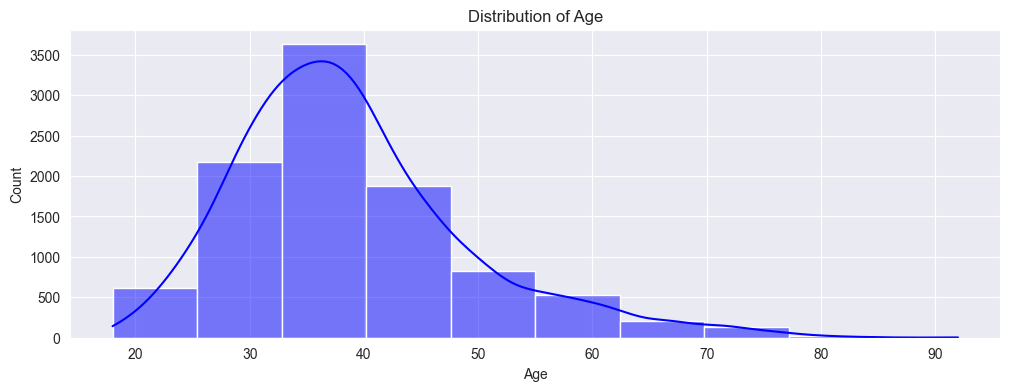

In [ ]:
# plot an histogram to show the distribution of customer by age
plt.figure(figsize=(12, 4))
sns.histplot(x=df['Age'], bins=10, color='blue', kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

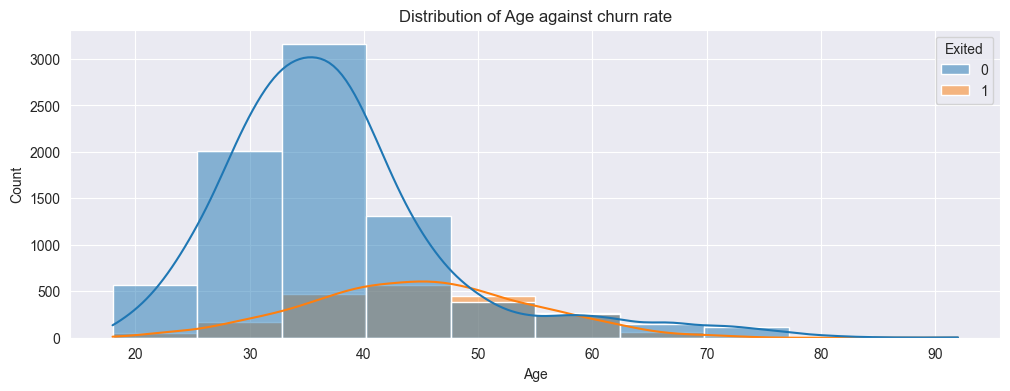

In [108]:
# plot an histogram to show the distribution of age by churn
plt.figure(figsize=(12, 4))
sns.histplot(x=df['Age'], bins=10, color='blue', kde=True, hue=df['Exited'])
plt.title('Distribution of Age against churn rate')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [16]:
df['Age'].max()

np.int64(92)

In [20]:
# Creating an age bracket
def age_bracket(age):
    if age <= 25:
        return '18-25'
    elif age <= 35:
        return '26-35'
    elif age <= 45:
        return '36-45'
    elif age <= 55:
        return '46-55'
    elif age <= 65:
        return '56-65'
    elif age <= 75:
        return '66-75'
    elif age <= 85:
        return '76-85'
    else:
        return 'Above 85'

In [22]:
# Applying to the Age column
df['age_bracket'] = df['Age'].apply(age_bracket)
df['age_bracket'].value_counts()

age_bracket
36-45       3736
26-35       3542
46-55       1311
18-25        611
56-65        536
66-75        219
76-85         42
Above 85       3
Name: count, dtype: int64

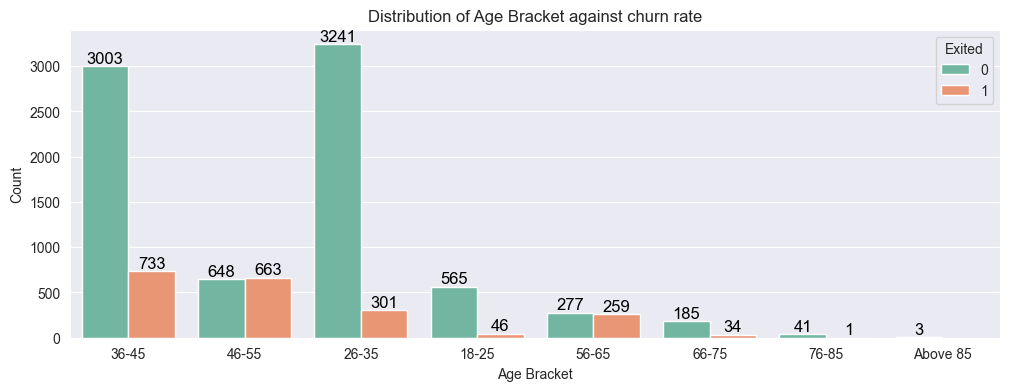

In [107]:
plt.figure(figsize=(12, 4))
sns.countplot(x='age_bracket', data=df, palette='Set2', hue='Exited')
plt.title('Distribution of Age Bracket against churn rate')
for container in plt.gca().containers:
    plt.gca().bar_label(container, label_type='edge', fontsize=12, color='black')
plt.xlabel('Age Bracket')
plt.ylabel('Count')
plt.show()

This shows the rate at which age group churn, and shows that the age bracket 36-45 has the highest churn rate even though the same age bracket has the highest number of customers.

In [25]:
# The churn rate of age bracket
churn_rate_by_age = pd.crosstab(df['Exited'], df['age_bracket'], normalize=True) * 100
churn_rate_by_age

age_bracket,18-25,26-35,36-45,46-55,56-65,66-75,76-85,Above 85
Exited,,,,,,,,
0,5.65,32.41,30.03,6.48,2.77,1.85,0.41,0.03
1,0.46,3.01,7.33,6.63,2.59,0.34,0.01,0.00


This just shows the percentage of customers that exited with respect to their age brcket

- #### Distribution and Percentage of Customer Gender

In [27]:
gender_counts = df['Gender'].value_counts()
gender_percentage = gender_counts/len(df) * 100
gender_percentage

Gender
Male      54.57
Female    45.43
Name: count, dtype: float64

Text(0.5, 1.0, 'Distribution of gender')

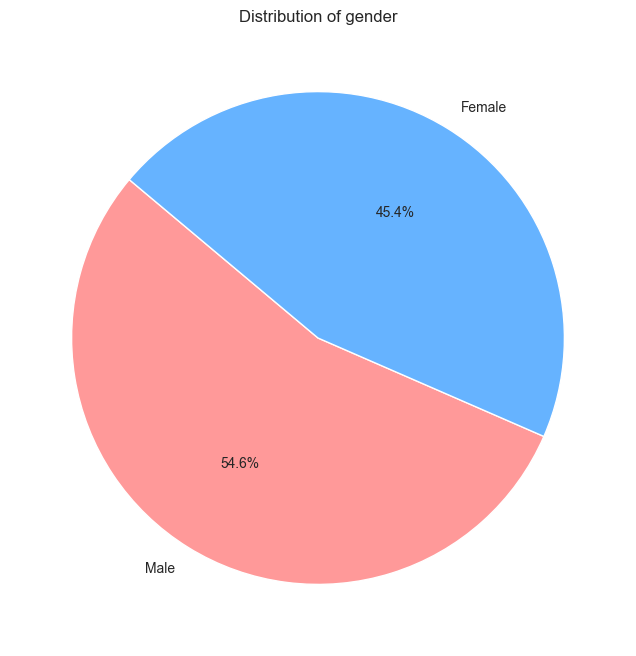

In [29]:
# Showing the distribution using pie chart
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
plt.title('Distribution of gender')

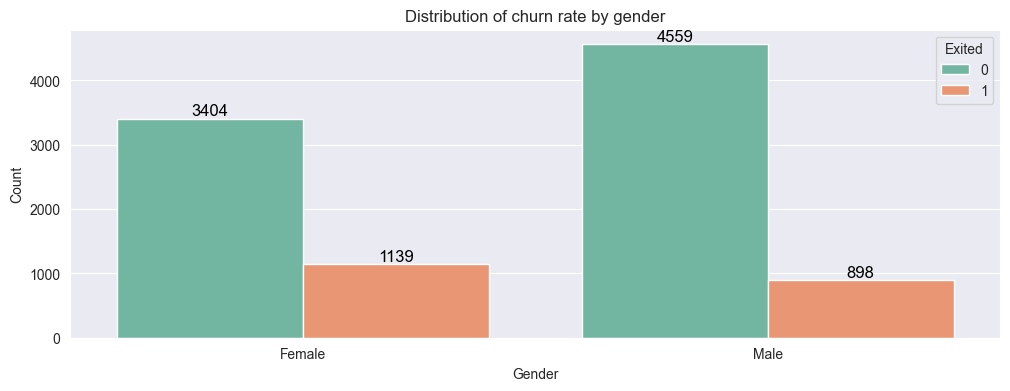

In [105]:
# Churn rate by gender
plt.figure(figsize=(12, 4))
sns.countplot(x='Gender', data=df, palette='Set2', hue='Exited')
plt.title('Distribution of churn rate by gender')
for container in plt.gca().containers:
    plt.gca().bar_label(container, label_type='edge', fontsize=12, color='black')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [40]:
churn_rate_by_gender = pd.crosstab(df['Exited'], df['Gender'], normalize=True) * 100
churn_rate_by_gender

Gender,Female,Male
Exited,,
0,34.04,45.59
1,11.39,8.98


- #### Distribution of Customer by Geography

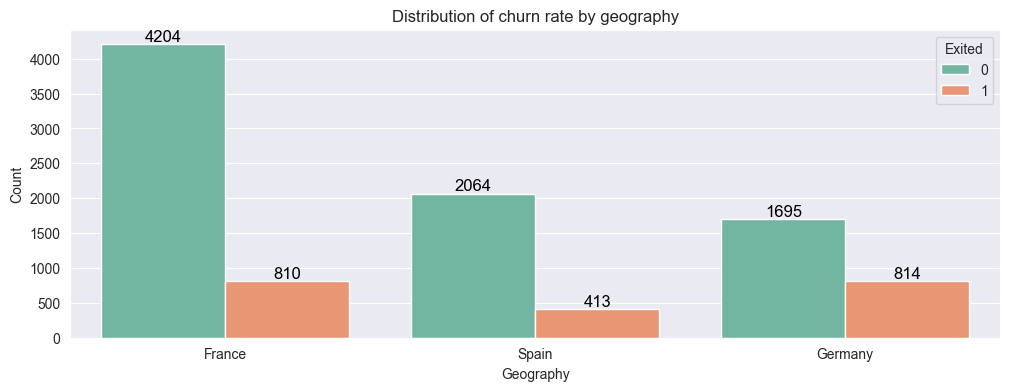

In [106]:
plt.figure(figsize=(12, 4))
sns.countplot(x='Geography', data=df, hue='Exited', palette='Set2')
plt.title('Distribution of churn rate by geography')
for container in plt.gca().containers:
    plt.gca().bar_label(container, label_type='edge', fontsize=12, color='black')
plt.xlabel('Geography')
plt.ylabel('Count')
plt.show()

In [ ]:
plt.figure(figsize=(12, 4))
sns.histplot(x='Geography', data=df, bins=10, color='blue', kde=True, hue='Exited')
plt.title('Distribution of Geography')
plt.xlabel('Geography')
plt.ylabel('Count')
plt.show()

In [39]:
churn_rate_by_geography = pd.crosstab(df['Exited'], df['Geography'], normalize=True) * 100
churn_rate_by_geography

Geography,France,Germany,Spain
Exited,,,
0,42.04,16.95,20.64
1,8.10,8.14,4.13


### Analyzing the Usage Pattern

- #### Churn rate of those using Credit Card

Text(0, 0.5, 'Count')

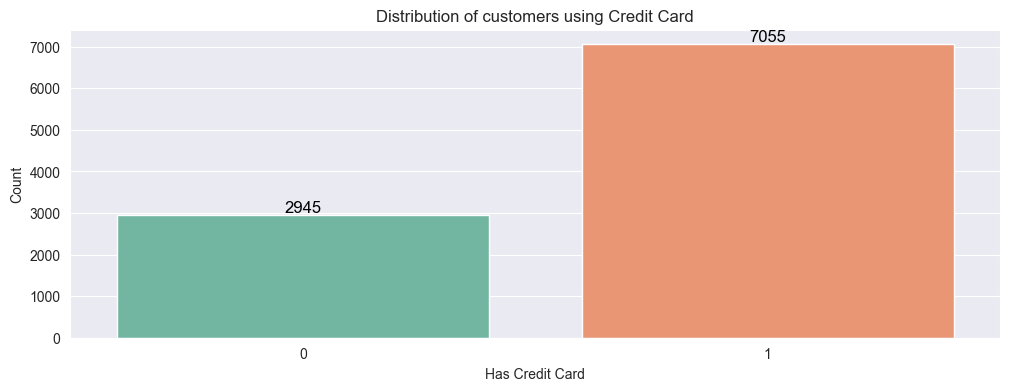

In [46]:
# How many customers are using Credit Card
plt.figure(figsize=(12, 4))
sns.countplot(x='HasCrCard', data=df, palette='Set2')
plt.title('Distribution of customers using Credit Card')
for container in plt.gca().containers:
    plt.gca().bar_label(container, label_type='edge', fontsize=12, color='black')
plt.xlabel('Has Credit Card')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

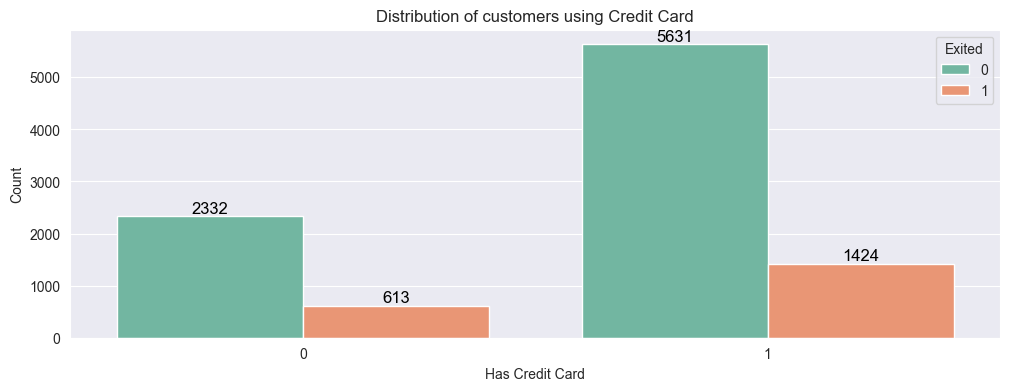

In [47]:
# Checking the distibution of churn rate by customers using Credit Card
plt.figure(figsize=(12, 4))
sns.countplot(x='HasCrCard', data=df, palette='Set2', hue='Exited')
plt.title('Distribution of customers using Credit Card')
for container in plt.gca().containers:
    plt.gca().bar_label(container, label_type='edge', fontsize=12, color='black')
plt.xlabel('Has Credit Card')
plt.ylabel('Count')

In [50]:
# Churn percentage of crecdit card users
churn_rate_by_credit_card = pd.crosstab(df['Exited'], df['HasCrCard'], normalize=True) * 100
churn_rate_by_credit_card

HasCrCard,0,1
Exited,,
0,23.32,56.31
1,6.13,14.24


This shows that customers with credit card tend to exit more than those without

- #### Churn rate of those that are members

Text(0, 0.5, 'Count')

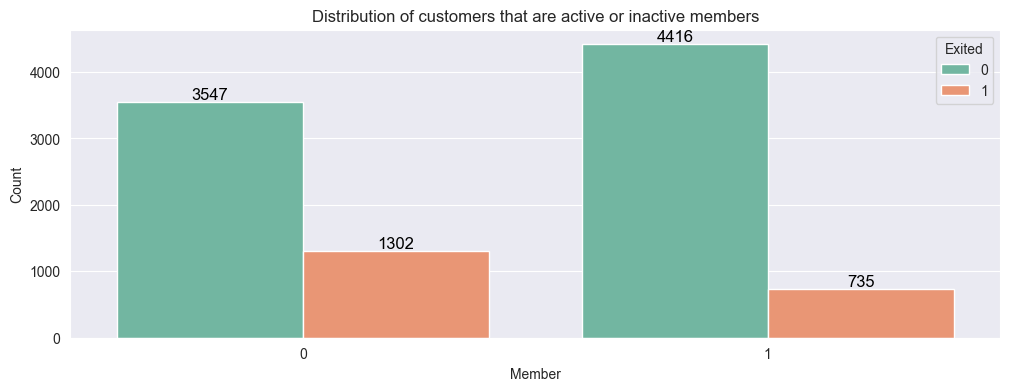

In [53]:
# How many customers are active members
plt.figure(figsize=(12, 4))
sns.countplot(x='IsActiveMember', data=df, palette='Set2', hue='Exited')
plt.title('Distribution of customers that are active or inactive members')
for container in plt.gca().containers:
    plt.gca().bar_label(container, label_type='edge', fontsize=12, color='black')
plt.xlabel('Member')
plt.ylabel('Count')

In [54]:
# Churn percentage of mmembers
churn_rate_by_credit_card = pd.crosstab(df['Exited'], df['IsActiveMember'], normalize=True) * 100
churn_rate_by_credit_card

IsActiveMember,0,1
Exited,,
0,35.47,44.16
1,13.02,7.35


### Examining the Balance, Estimated Salary, and Credit Score

In [57]:
bsc = df[['Balance', 'EstimatedSalary', 'CreditScore']]
bsc.head(2)

,Balance,EstimatedSalary,CreditScore
0,0.00,101348.88,619
1,83807.86,112542.58,608


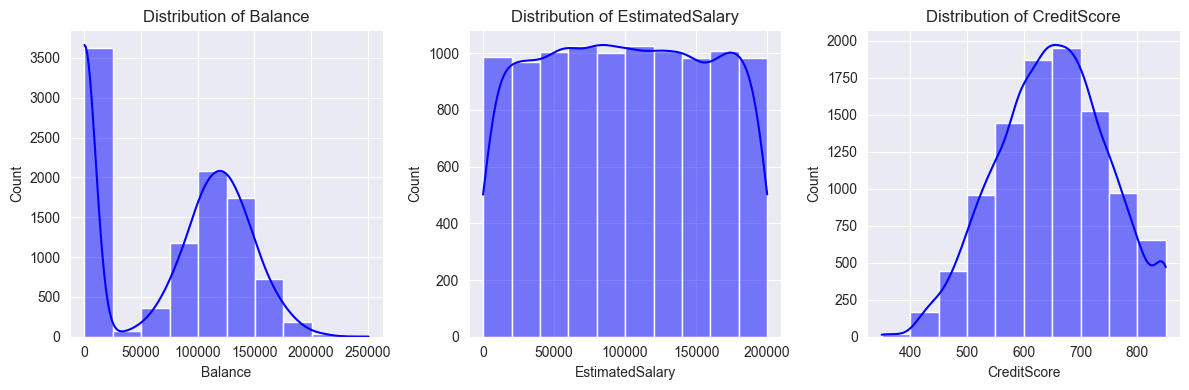

In [58]:
# Distribution plot of B.S.C
plt.figure(figsize=(12, 4))
for i in bsc.columns:
    plt.subplot(1, 3, bsc.columns.get_loc(i) + 1)
    sns.histplot(bsc[i], bins=10, kde=True, color='blue')
    plt.title(f'Distribution of {i}')
    plt.xlabel(i)
    plt.ylabel('Count')
plt.tight_layout()

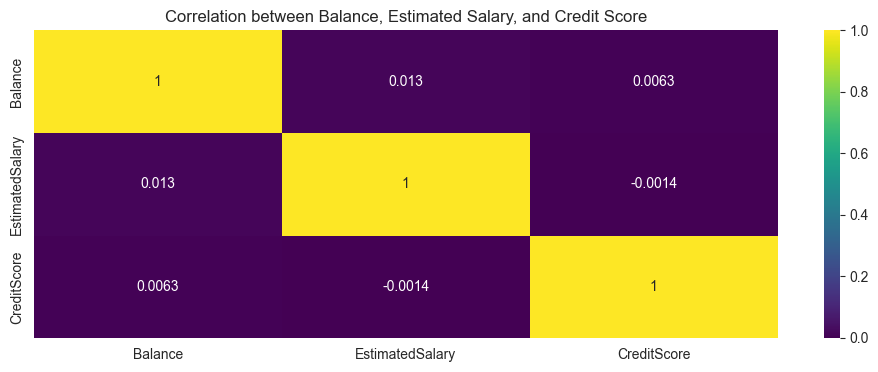

In [62]:
# Checking the corellation between balance and estimated salary and credit score
correlation = bsc.corr()
plt.figure(figsize=(12, 4))
sns.heatmap(correlation, annot=True, cmap='viridis')
plt.title('Correlation between Balance, Estimated Salary, and Credit Score')
plt.show()

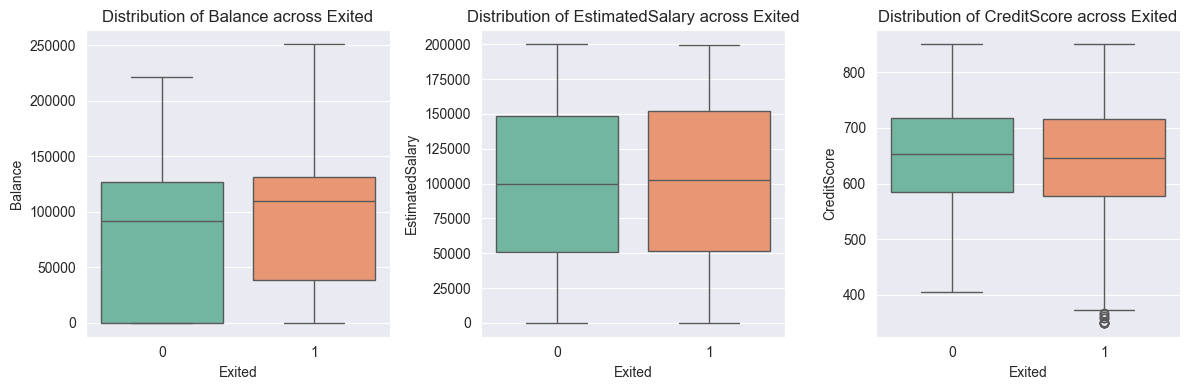

In [67]:
# Boxplot to show the distribution across Exited
plt.figure(figsize=(12, 4))
for i in bsc.columns:
    plt.subplot(1, 3, bsc.columns.get_loc(i) + 1)
    sns.boxplot(x='Exited', y=i, data=df, palette='Set2')
    plt.title(f'Distribution of {i} across Exited')
    plt.xlabel('Exited')
    plt.ylabel(i)
plt.tight_layout()

In [68]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'age_bracket'],
      dtype='object')

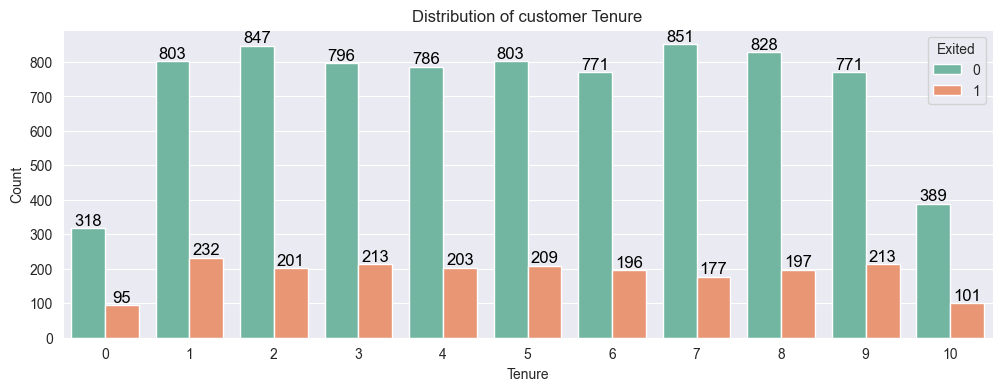

In [70]:
# Checking the distribution of Exited customers by Tenure
plt.figure(figsize=(12, 4))
sns.countplot(x='Tenure', data=df, palette='Set2', hue='Exited')
plt.title('Distribution of customer Tenure')
for container in plt.gca().containers:
    plt.gca().bar_label(container, label_type='edge', fontsize=12, color='black')
plt.xlabel('Tenure')
plt.ylabel('Count')
plt.show()

### Analyzing Products

In [71]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'age_bracket'],
      dtype='object')

In [74]:
df['NumOfProducts'].value_counts()

NumOfProducts
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

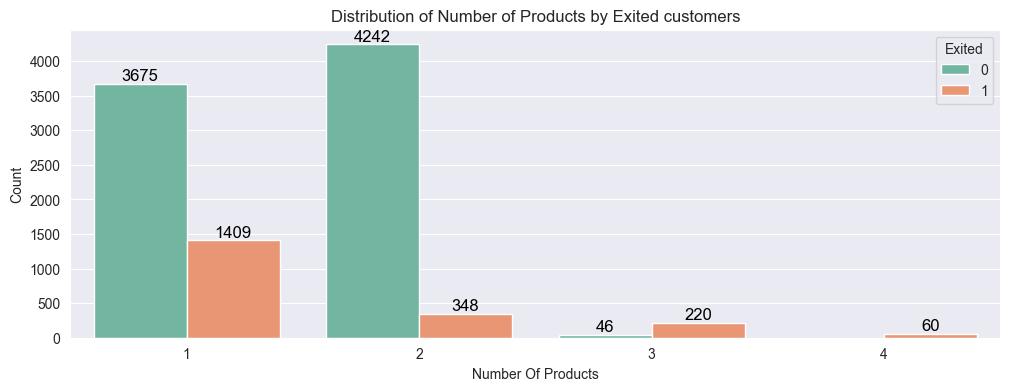

In [77]:
# Checking the distribution of Exited customers by Number of Products
plt.figure(figsize=(12, 4))
sns.countplot(x='NumOfProducts', data=df, palette='Set2', hue='Exited')
plt.title('Distribution of Number of Products by Exited customers')
for container in plt.gca().containers:
    plt.gca().bar_label(container, label_type='edge', fontsize=12, color='black')
plt.xlabel('Number Of Products')
plt.ylabel('Count')
plt.show()

## Step 3: Machine Learning

In [78]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'age_bracket'],
      dtype='object')

In [84]:
# Splitting into X and y
X = df.drop(['Exited', 'Surname', 'CustomerId', 'RowNumber', 'age_bracket'], axis=1)
y = df[['Exited']]

### Data Processing

In [85]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X['Geography'] = le.fit_transform(X['Geography'])
X['Gender'] = le.fit_transform(X['Gender'])
X.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58


In [86]:
# Mapping the target variable
y['ChurnCode'] = df['Exited'].replace({0: 'No Churn', 1: 'Churn'})
y.head(2)

,Exited,ChurnCode
0,1,Churn
1,0,No Churn


In [139]:
# Manually mapping the target variable again to maintain the feature names and creating class names
y_feature = y['ChurnCode'].map({'No Churn': 0, 'Churn': 1})
class_names = ['No Churn', 'Churn']
y_feature.head(2)

0    1
1    0
Name: ChurnCode, dtype: int64

In [140]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_feature = pd.DataFrame(X_scaled, columns=X.columns)
X_feature.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,-0.326221,-0.901886,-1.095988,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886
1,-0.440036,1.515067,-1.095988,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534


### Training and Testing sets

In [141]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_feature, y_feature, test_size=0.2, random_state=42)
display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8000, 10)

(2000, 10)

(8000,)

(2000,)

In [ ]:
# Importing all libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost as xgb
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [147]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(max_depth=3, random_state=42, min_samples_leaf=5),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(probability=True),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'LightGBM': LGBMClassifier(),
    'CatBoost': CatBoostClassifier(silent=True)
}

# Fitting the models
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = model.score(X_test, y_test)
    results[model_name] = accuracy

[LightGBM] [Info] Number of positive: 1644, number of negative: 6356
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000304 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 861
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.205500 -> initscore=-1.352267
[LightGBM] [Info] Start training from score -1.352267


Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.83      0.97      0.89      1607
           1       0.60      0.18      0.28       393

    accuracy                           0.82      2000
   macro avg       0.71      0.58      0.59      2000
weighted avg       0.78      0.82      0.77      2000

Accuracy: 0.8155
ROC AUC Score: 0.5766683925763716




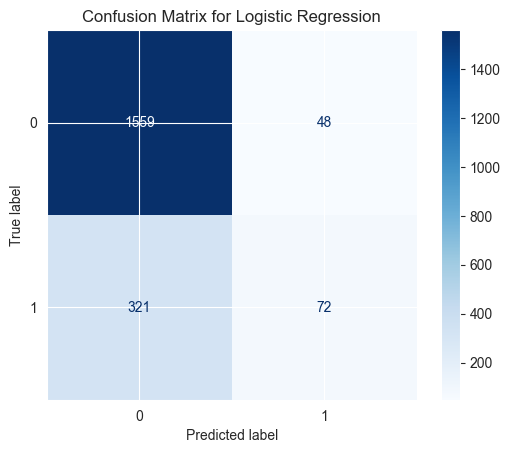



Model: Random Forest
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.77      0.47      0.59       393

    accuracy                           0.87      2000
   macro avg       0.83      0.72      0.75      2000
weighted avg       0.86      0.87      0.86      2000

Accuracy: 0.8685
ROC AUC Score: 0.719217450372179




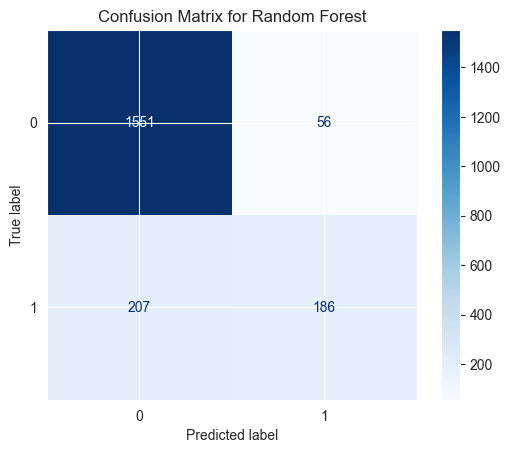



Model: Decision Tree
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1607
           1       0.68      0.43      0.53       393

    accuracy                           0.85      2000
   macro avg       0.78      0.69      0.72      2000
weighted avg       0.83      0.85      0.83      2000

Accuracy: 0.8485
ROC AUC Score: 0.6913938858461153




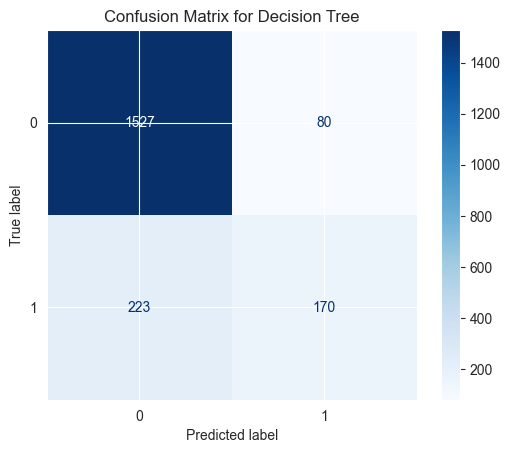



Model: KNN
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      1607
           1       0.63      0.38      0.48       393

    accuracy                           0.83      2000
   macro avg       0.75      0.66      0.69      2000
weighted avg       0.82      0.83      0.82      2000

Accuracy: 0.835
ROC AUC Score: 0.6647317477131697




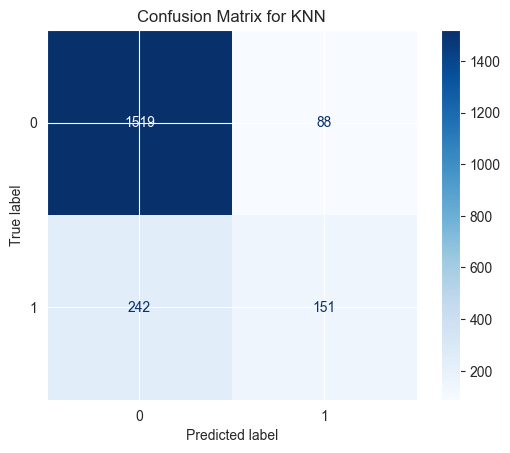



Model: SVM
              precision    recall  f1-score   support

           0       0.86      0.98      0.92      1607
           1       0.80      0.37      0.50       393

    accuracy                           0.86      2000
   macro avg       0.83      0.67      0.71      2000
weighted avg       0.85      0.86      0.84      2000

Accuracy: 0.8575
ROC AUC Score: 0.6720051112261717




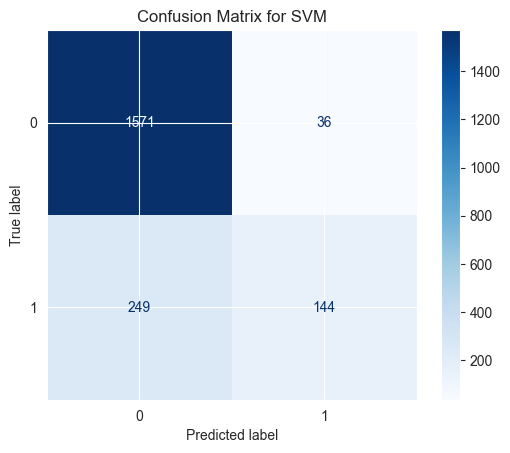



Model: XGBoost
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1607
           1       0.68      0.49      0.57       393

    accuracy                           0.86      2000
   macro avg       0.78      0.72      0.74      2000
weighted avg       0.84      0.86      0.85      2000

Accuracy: 0.8555
ROC AUC Score: 0.7188168493122488




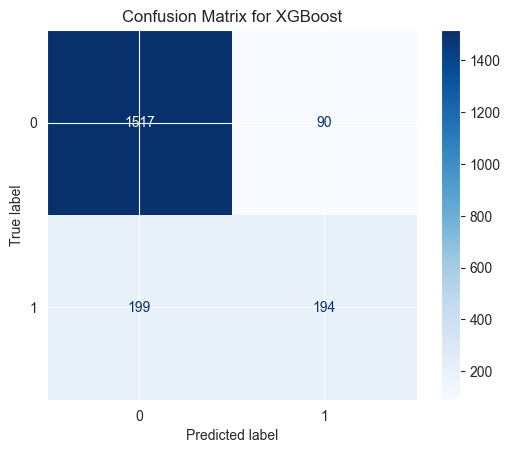



Model: LightGBM
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.73      0.49      0.59       393

    accuracy                           0.86      2000
   macro avg       0.81      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000

Accuracy: 0.864
ROC AUC Score: 0.7221839566400813




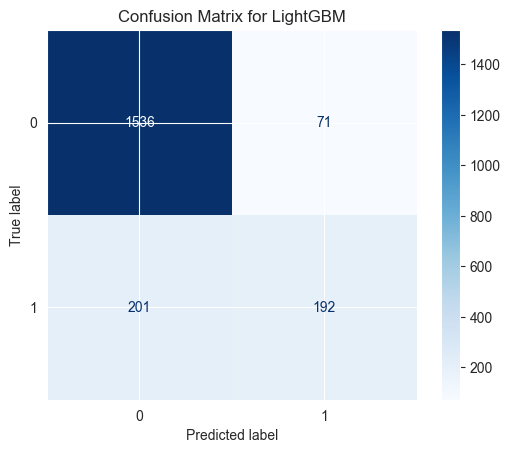



Model: CatBoost
              precision    recall  f1-score   support

           0       0.89      0.96      0.92      1607
           1       0.74      0.49      0.59       393

    accuracy                           0.87      2000
   macro avg       0.81      0.73      0.76      2000
weighted avg       0.86      0.87      0.86      2000

Accuracy: 0.867
ROC AUC Score: 0.7259730409737297




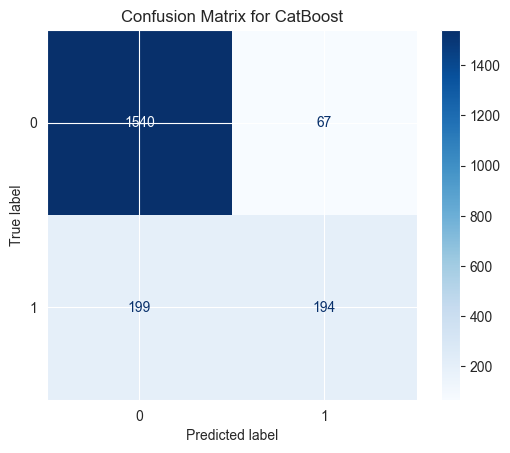

In [148]:
# Evaluation of the models
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, ConfusionMatrixDisplay
for model_name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"Model: {model_name}")
    print(classification_report(y_test, y_pred))
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred)}")
    print("\n")

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(cm, display_labels=model.classes_)
    disp.plot(cmap='Blues')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()
    print("\n")

#### Model Results Summary

- Trained 8 models: Logistic Regression, Random Forest, Decision Tree, KNN, SVM, XGBoost, LightGBM, CatBoost.
- Accuracy scores were good (~83%–87%), but recall for "Churn" class was low.
- ROC AUC scores showed models struggle with detecting churn properly.
- Issue: Imbalanced dataset — "No Churn" dominates, affecting model performance.

#### Next Step
Apply **SMOTE** to balance the classes and improve recall, F1-score, and ROC AUC.

### SMOTE Balancing

In [151]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
X_resampled.shape, y_resampled.shape

((12712, 10), (12712,))

In [152]:
# Applying the models again on the resampled data
results_resampled = {}
for model_name, model in models.items():
    model.fit(X_resampled, y_resampled)
    y_pred_2 = model.predict(X_test)
    accuracy = model.score(X_test, y_test)
    results_resampled[model_name] = accuracy

[LightGBM] [Info] Number of positive: 6356, number of negative: 6356
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001254 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1856
[LightGBM] [Info] Number of data points in the train set: 12712, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1607
           1       0.37      0.69      0.48       393

    accuracy                           0.71      2000
   macro avg       0.64      0.70      0.64      2000
weighted avg       0.80      0.71      0.74      2000

Accuracy: 0.7105
ROC AUC Score: 0.7025932980867736




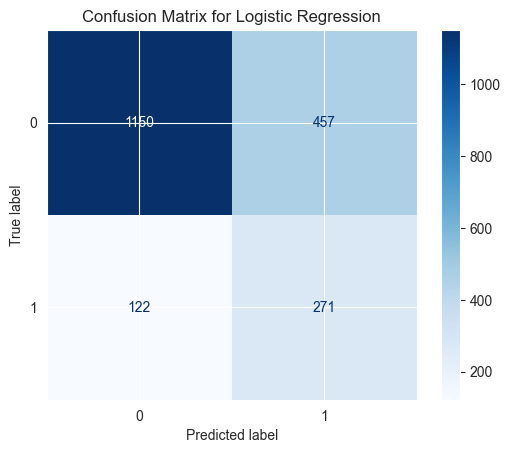



Model: Random Forest
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      1607
           1       0.60      0.60      0.60       393

    accuracy                           0.84      2000
   macro avg       0.75      0.75      0.75      2000
weighted avg       0.84      0.84      0.84      2000

Accuracy: 0.8415
ROC AUC Score: 0.7485499983374264




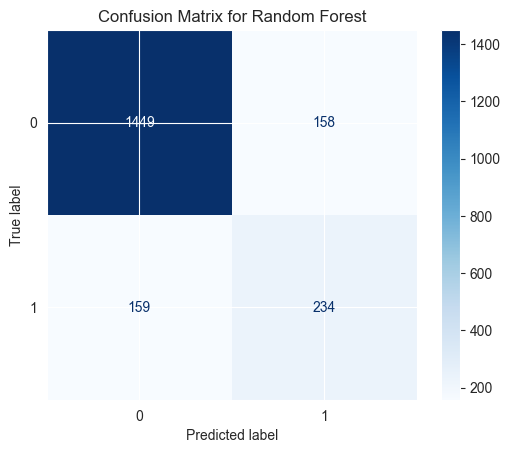



Model: Decision Tree
              precision    recall  f1-score   support

           0       0.92      0.66      0.77      1607
           1       0.35      0.76      0.48       393

    accuracy                           0.68      2000
   macro avg       0.64      0.71      0.62      2000
weighted avg       0.81      0.68      0.71      2000

Accuracy: 0.6785
ROC AUC Score: 0.7095919411100606




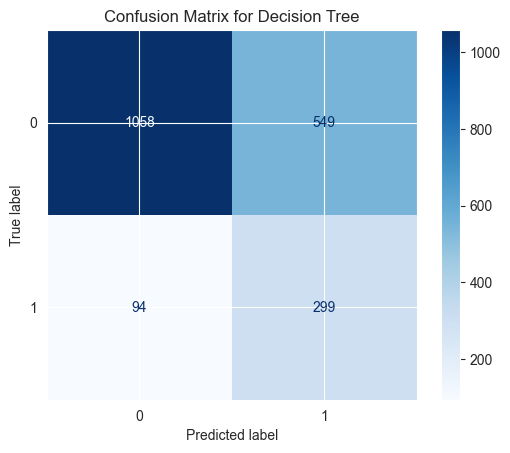



Model: KNN
              precision    recall  f1-score   support

           0       0.90      0.77      0.83      1607
           1       0.41      0.65      0.50       393

    accuracy                           0.74      2000
   macro avg       0.65      0.71      0.66      2000
weighted avg       0.80      0.74      0.76      2000

Accuracy: 0.7445
ROC AUC Score: 0.7102949722191874




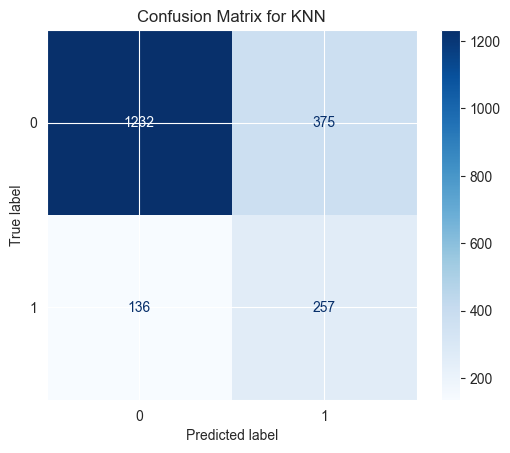



Model: SVM
              precision    recall  f1-score   support

           0       0.92      0.80      0.86      1607
           1       0.47      0.73      0.58       393

    accuracy                           0.79      2000
   macro avg       0.70      0.77      0.72      2000
weighted avg       0.84      0.79      0.80      2000

Accuracy: 0.788
ROC AUC Score: 0.7661978209202424




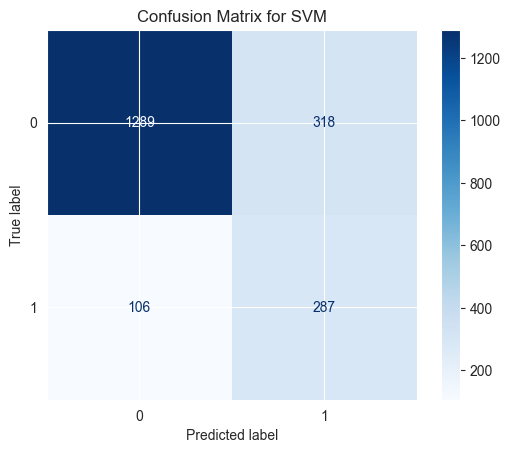



Model: XGBoost
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1607
           1       0.65      0.55      0.60       393

    accuracy                           0.85      2000
   macro avg       0.77      0.74      0.75      2000
weighted avg       0.85      0.85      0.85      2000

Accuracy: 0.8525
ROC AUC Score: 0.7390559115574197




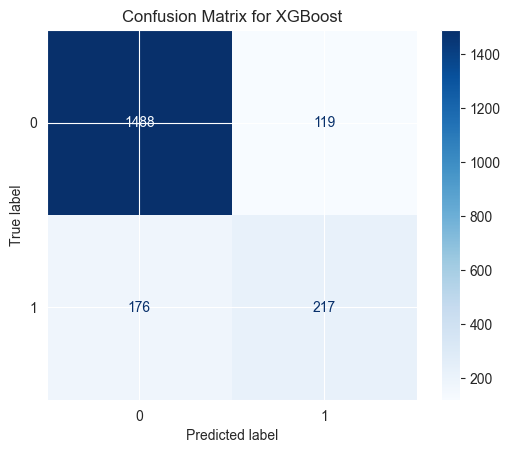



Model: LightGBM
              precision    recall  f1-score   support

           0       0.90      0.93      0.92      1607
           1       0.68      0.56      0.61       393

    accuracy                           0.86      2000
   macro avg       0.79      0.75      0.76      2000
weighted avg       0.85      0.86      0.86      2000

Accuracy: 0.8605
ROC AUC Score: 0.745956383569973




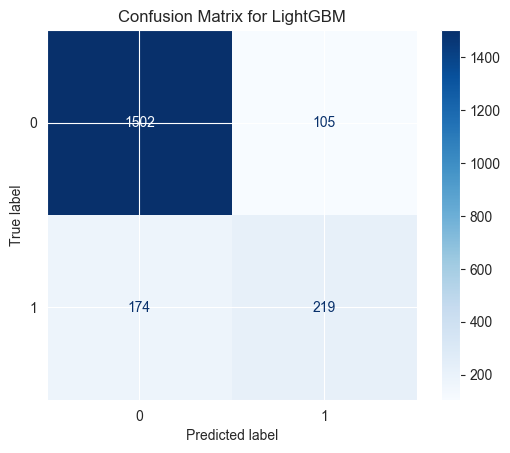



Model: CatBoost
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1607
           1       0.67      0.55      0.61       393

    accuracy                           0.86      2000
   macro avg       0.78      0.74      0.76      2000
weighted avg       0.85      0.86      0.85      2000

Accuracy: 0.8585
ROC AUC Score: 0.7427895767721054




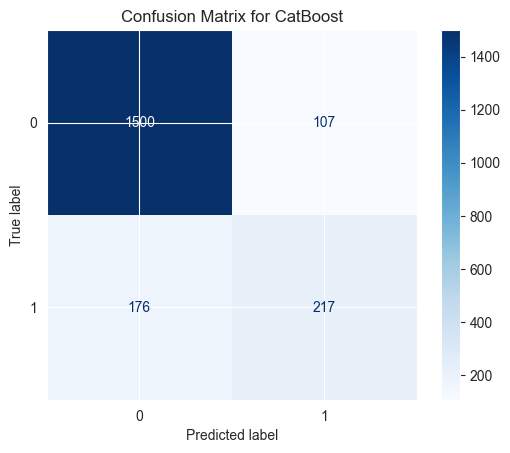

In [153]:
# Evaluation of the models on resampled data
for model_name, model in models.items():
    y_pred_2 = model.predict(X_test)
    print(f"Model: {model_name}")
    print(classification_report(y_test, y_pred_2))
    print(f"Accuracy: {accuracy_score(y_test, y_pred_2)}")
    print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_2)}")
    print("\n")

    cm = confusion_matrix(y_test, y_pred_2)
    disp = ConfusionMatrixDisplay(cm, display_labels=model.classes_)
    disp.plot(cmap='Blues')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()
    print("\n")

#### Model Results After SMOTE

- Applied **SMOTE** to balance churn and no-churn classes.
- Models now show improved **recall** and **ROC AUC scores** for the minority class ("Churn").
- Accuracy remains strong (~71%–86%), with better balance between precision and recall.
- Models like **LightGBM**, **CatBoost**, and **XGBoost** performed best after balancing.

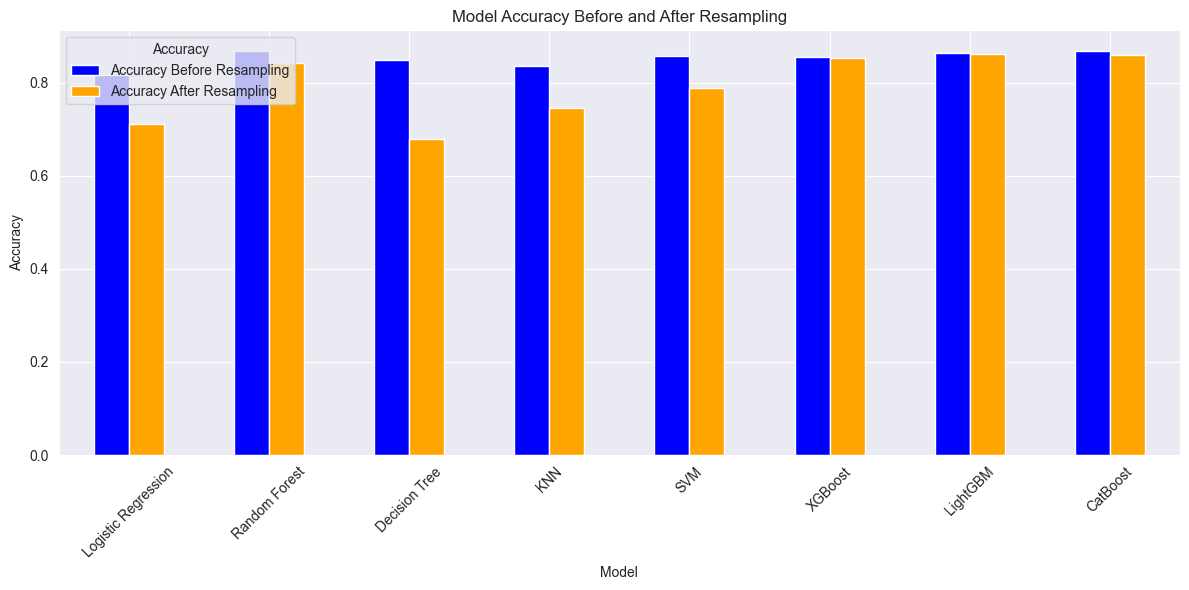

In [ ]:
# Comparing results before and after resampling
results_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy Before Resampling': list(results.values()),
    'Accuracy After Resampling': list(results_resampled.values())
})
results_df.set_index('Model', inplace=True)
results_df.plot(kind='bar', figsize=(12, 6), color=['blue', 'orange'])
plt.title('Model Accuracy Before and After Resampling')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.legend(title='Accuracy', loc='upper left')
plt.tight_layout()
plt.show()

[LightGBM] [Info] Number of positive: 6356, number of negative: 6356
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001291 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1856
[LightGBM] [Info] Number of data points in the train set: 12712, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


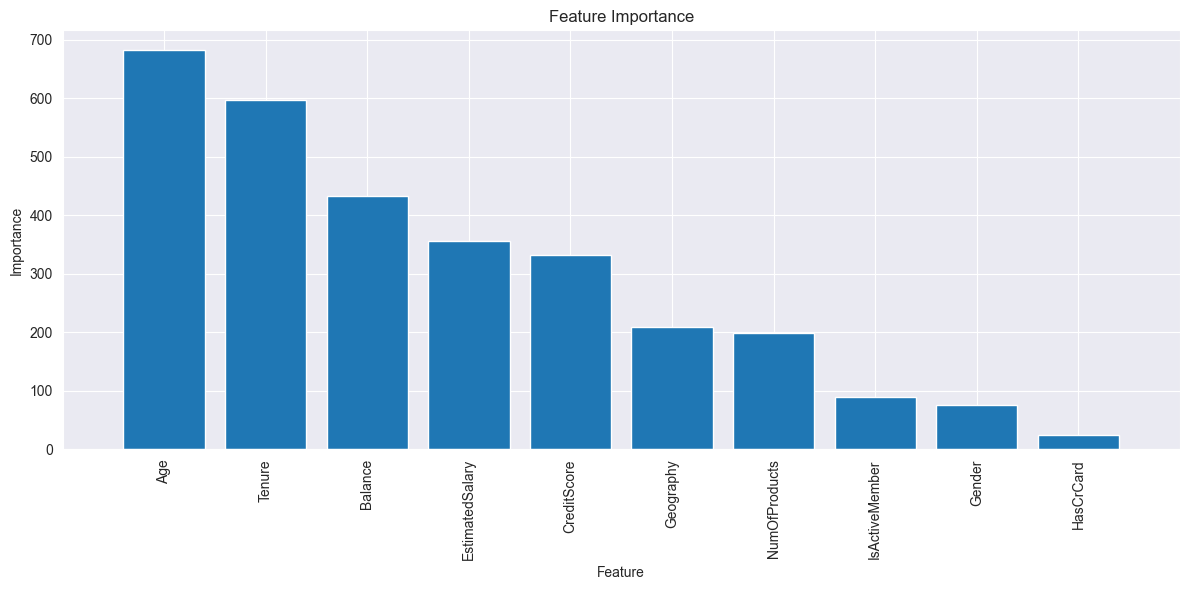

In [159]:
# Feature Importance using LightGBM
lgbm_model = LGBMClassifier()
lgbm_model.fit(X_resampled, y_resampled)
importances = lgbm_model.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12, 6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

#### 📋 Feature Importance Insights (LightGBM)
Top Factors Influencing Churn:

Age: Older customers are at higher risk of churn.

Tenure: Customers with shorter tenure are more likely to churn.

Balance: Customers with certain balance patterns show higher churn risks.

Other Important Factors:

Estimated Salary, Credit Score, and Geography also impact churn but to a lesser extent.

Has Credit Card and Gender have minimal impact compared to the others


#### Business Actions can thus be taken based on these insights.